In [1]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import numpy as np

In [2]:
image = Image.open('Data/clown.tif').convert('L')

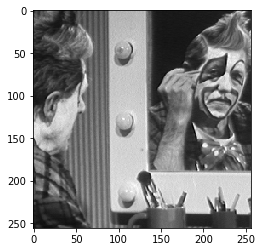

In [3]:
plt.imshow(image,cmap='gray')

In [4]:
### Make rectangular images to a square one
x, y = image.size
size = min(x, y)
image = image.resize((size,size), PIL.Image.ANTIALIAS)

In [5]:
image = np.asarray(image)
template = np.asarray([[1/18,1/18,1/18],[1/18,1/18,1/18],[1/18,1/18,1/18]])
#template = np.asarray(template)
image=image/255

print(image.shape," ",template.shape)


(256, 256)   (3, 3)


In [6]:
# assuming that the image shape is a square and filter is also a square filter
def padding(image,filters,stride=1):
    padding= (((image.shape[0]-1)*stride)-(image.shape[0]-filters.shape[0]))/2
    return padding

In [7]:
pad=padding(image,template)

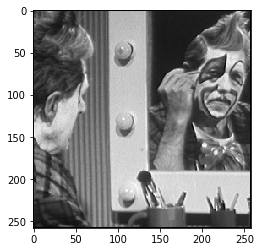

In [8]:
newrow= np.zeros(shape=(image.shape[1]))
newcol= np.zeros(shape=(image.shape[0]+int(2*pad)))
newcol = np.reshape(newcol,(newcol.shape[0],1))
Z=image
for i in range(0,int(pad)):
    Z= np.vstack([Z, newrow])
    Z=np.vstack([newrow,Z])
for i in range(0,int(pad)):
    Z= np.hstack([Z, newcol])
    Z=np.hstack([newcol,Z])
plt.imshow(Z,cmap='gray')    

In [9]:
print(Z)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.20784314 0.21960784 ... 0.18039216 0.17647059 0.        ]
 [0.         0.22352941 0.21568627 ... 0.18039216 0.18431373 0.        ]
 ...
 [0.         0.08235294 0.09019608 ... 0.21176471 0.23529412 0.        ]
 [0.         0.09411765 0.08627451 ... 0.24313725 0.23137255 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [10]:
for i in range(int(pad),0,-1):
    Z[i-1]=Z[i]
    Z[:,i-1]=Z[:,i]
for i in range(int(Z.shape[0]-pad-1),Z.shape[0]-1,1):
    Z[i+1]=Z[i]
    Z[:,i+1]=Z[:,i]

In [11]:
print(Z)

[[0.20784314 0.20784314 0.21960784 ... 0.18039216 0.17647059 0.17647059]
 [0.20784314 0.20784314 0.21960784 ... 0.18039216 0.17647059 0.17647059]
 [0.22352941 0.22352941 0.21568627 ... 0.18039216 0.18431373 0.18431373]
 ...
 [0.08235294 0.08235294 0.09019608 ... 0.21176471 0.23529412 0.23529412]
 [0.09411765 0.09411765 0.08627451 ... 0.24313725 0.23137255 0.23137255]
 [0.09411765 0.09411765 0.08627451 ... 0.24313725 0.23137255 0.23137255]]


In [12]:
def my_conv2(image, filters):
    # perform cross_correlation between image and filter
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1)))
    #output = np.zeros(shape=(image.shape[0],image.shape[1]))
    filters = np.flip(np.flip(filters,axis=0),axis=1)
    print("Output shape is ",output.shape)
    k1= (int)((filters.shape[0]-1)/2)
    rem1= filters.shape[0]-(2*k1)
    k2= int((filters.shape[1]-1)/2)
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

In [13]:
imageOut=my_conv2(Z, template)

Output shape is  (256, 256)


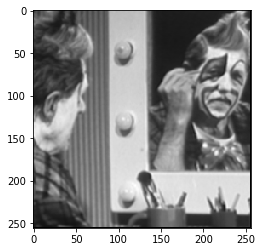

In [14]:
plt.imshow(imageOut,cmap='gray')

In [15]:
import numpy as np
temp = np.array([['a','b','c'],['d','e','f'],['g','h','i']])
print(temp)

[['a' 'b' 'c']
 ['d' 'e' 'f']
 ['g' 'h' 'i']]


In [16]:
flip1= np.flip(temp,axis=0)
print(flip1)

[['g' 'h' 'i']
 ['d' 'e' 'f']
 ['a' 'b' 'c']]


In [17]:
flip2= np.flip(flip1,axis=1)
print(flip2)

[['i' 'h' 'g']
 ['f' 'e' 'd']
 ['c' 'b' 'a']]
